In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pandas as pd

In [3]:
dataset= pd.read_csv('../Final_Project_SQL/2019_Happiness_Report.csv')

In [4]:
print(dataset)

     Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.769           1.340   
1               2                   Denmark  7.600           1.383   
2               3                    Norway  7.554           1.488   
3               4                   Iceland  7.494           1.380   
4               5               Netherlands  7.488           1.396   
..            ...                       ...    ...             ...   
151           152                    Rwanda  3.334           0.359   
152           153                  Tanzania  3.231           0.476   
153           154               Afghanistan  3.203           0.350   
154           155  Central African Republic  3.083           0.026   
155           156               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.587                    0.986                         0.596   
1  

In [5]:
# X=dataset.iloc[:, [2,8]].values
X=dataset.iloc[:, [3,4,5,6,7,8]].values

In [6]:
print(X)

[[1.34  1.587 0.986 0.596 0.153 0.393]
 [1.383 1.573 0.996 0.592 0.252 0.41 ]
 [1.488 1.582 1.028 0.603 0.271 0.341]
 [1.38  1.624 1.026 0.591 0.354 0.118]
 [1.396 1.522 0.999 0.557 0.322 0.298]
 [1.452 1.526 1.052 0.572 0.263 0.343]
 [1.387 1.487 1.009 0.574 0.267 0.373]
 [1.303 1.557 1.026 0.585 0.33  0.38 ]
 [1.365 1.505 1.039 0.584 0.285 0.308]
 [1.376 1.475 1.016 0.532 0.244 0.226]
 [1.372 1.548 1.036 0.557 0.332 0.29 ]
 [1.034 1.441 0.963 0.558 0.144 0.093]
 [1.276 1.455 1.029 0.371 0.261 0.082]
 [1.609 1.479 1.012 0.526 0.194 0.316]
 [1.333 1.538 0.996 0.45  0.348 0.278]
 [1.499 1.553 0.999 0.516 0.298 0.31 ]
 [1.373 1.454 0.987 0.495 0.261 0.265]
 [1.356 1.504 0.986 0.473 0.16  0.21 ]
 [1.433 1.457 0.874 0.454 0.28  0.128]
 [1.269 1.487 0.92  0.457 0.046 0.036]
 [1.503 1.31  0.825 0.598 0.262 0.182]
 [1.3   1.52  0.999 0.564 0.375 0.151]
 [1.07  1.323 0.861 0.433 0.074 0.073]
 [1.324 1.472 1.045 0.436 0.111 0.183]
 [1.368 1.43  0.914 0.351 0.242 0.097]
 [1.159 1.369 0.92  0.357

In [7]:
from sklearn.cluster import KMeans
wcss= []

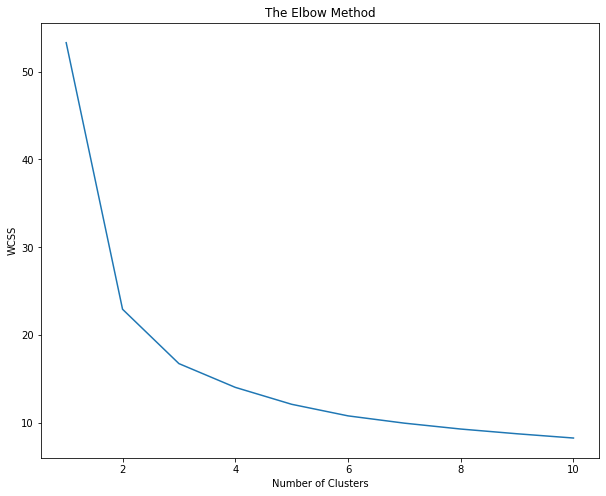

In [8]:
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    clf.fit(X)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS

plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [9]:
# plt.scatter(X[:, 0], X[:, 1], c=predicted_clusters, s=50, cmap='viridis')
plt.show()

In [10]:
clf = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10,  random_state=0)
y_kmeans = clf.fit_predict(X)


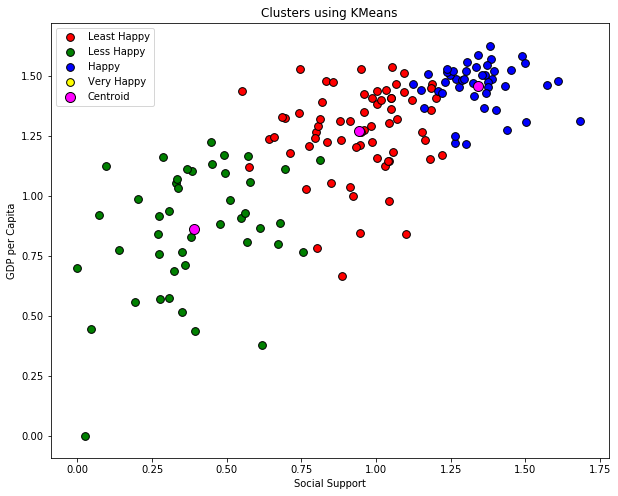

In [11]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color='red', s=60, label='Least Happy', edgecolors='black')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color='green', s=60, label='Less Happy', edgecolors='black')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color='blue',s=60, label='Happy', edgecolors='black')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color='yellow', s=60, label='Very Happy', edgecolors='black')
# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color='cyan', s=60, label='Cluster 5', edgecolors='black')
# cluster centres
plt.scatter(clf.cluster_centers_[:, 0], clf.cluster_centers_[:, 1], color='magenta', s=100, label='Centroid',edgecolors='black')
plt.legend()
plt.title('Clusters using KMeans')
plt.ylabel('GDP per Capita')
plt.xlabel('Social Support')
plt.show()

In [12]:
clf

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [13]:
clf.cluster_centers_

array([[0.94370149, 1.2691791 , 0.76529851, 0.38732836, 0.15895522,
        0.07049254],
       [0.39102273, 0.86186364, 0.41825   , 0.31372727, 0.20779545,
        0.09922727],
       [1.34044444, 1.46017778, 0.96622222, 0.47888889, 0.20577778,
        0.17991111]])

In [14]:
print(y_kmeans)

[2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 0 2 2 0 2 2
 2 2 2 0 2 0 2 0 0 0 0 2 0 0 0 0 2 2 0 0 2 0 2 0 0 0 2 0 2 1 0 0 0 0 0 0 1
 0 2 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1
 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1]


In [15]:
kmean_df = pd.DataFrame(y_kmeans)

In [16]:
kmean_df

,0
0,2
1,2
2,2
3,2
4,2
...,...
151,1
152,1
153,1
154,1


In [17]:
kmean_df = kmean_df.rename(columns={0:'Cluster'})

In [18]:
kmean_df['Cluster'].replace(2,'High Happy Score', inplace=True)
kmean_df['Cluster'].replace(1,'Least Happy Score', inplace=True)
kmean_df['Cluster'].replace(0,'Moderate Happy Score', inplace=True)

In [19]:
kmean_df

,Cluster
0,High Happy Score
1,High Happy Score
2,High Happy Score
3,High Happy Score
4,High Happy Score
...,...
151,Least Happy Score
152,Least Happy Score
153,Least Happy Score
154,Least Happy Score


In [20]:
dataset.keys()

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [21]:
original_df = pd.DataFrame({'Overall Rank':dataset['Overall rank'],
                            'Country or Region':dataset['Country or region'],
                            'Score':dataset['Score'], 
                            'GDP per capita':dataset['GDP per capita'],
                            'Social support':dataset['Social support'],
                            'Healthy life expectancy':dataset['Healthy life expectancy'],
                            'Freedom to make life choices':dataset['Freedom to make life choices'],
                            'Generosity':dataset['Generosity'],
                            'Perceptions of corruption':dataset['Perceptions of corruption'],
                            'Cluster':kmean_df['Cluster']
                           })

In [22]:
original_df

,Overall Rank,Country or Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Cluster
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,High Happy Score
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,High Happy Score
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,High Happy Score
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,High Happy Score
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,High Happy Score
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,Least Happy Score
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,Least Happy Score
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,Least Happy Score
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,Least Happy Score


In [23]:
original_df.to_csv('Happiness_Clusters.csv')